In [50]:
import pandas as pd

In [51]:
df= pd.read_csv(r"C:\Users\harsh\Desktop\Google Play Store Project\googleplaystore.csv")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [53]:
df.shape

(10841, 13)

In [54]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [55]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [56]:
print("Reviews_dirty:", df[~df['Reviews'].str.isnumeric()]['Reviews'].unique())

Reviews_dirty: ['3.0M']


In [57]:
print("Installs_dirty:", df[~df['Installs'].str.replace(',','', regex= False).str.replace('+','',regex= False).str.isnumeric()]['Installs'].unique())

Installs_dirty: ['Free']


In [58]:
print ("Size_dirty:", df[~df['Size'].str.replace('M', '').str.replace('k','').str.replace('.','',regex=False).str.isnumeric()]['Size'].unique())

Size_dirty: ['Varies with device' '1,000+']


In [59]:
print("Price_dirty:", df[~df['Price'].str.replace('$','',regex =False).str.replace('.','',regex=False).str.isnumeric()]['Price'].unique())

Price_dirty: ['Everyone']


In [60]:
def clean_Reviews(x) :
    try:
      if "M"in x: 
        return int(float(x.replace("M", ""))*1e6)
      elif x.isnumeric():
        return int(x)
      else:
        return None
    except:
        return None
df['Reviews'] = df['Reviews'].astype(str).apply (clean_Reviews)

In [61]:
def clean_installs(x):
    try:
        x = x.replace(",","").replace("+", "").strip()
        if x.isnumeric():
             return int(x)
        else:
             return None
    except:
        return None
df['Installs'] = df['Installs'].astype(str).apply(clean_installs)

In [62]:
def clean_size(x):
    try:
        x= x.strip()
        if "M" in x :
            return float(x.replace("M",""))*1e6
        elif "k" in x.lower():
            return float(x.replace("k","").replace("K", ""))*1e3
        elif x.replace(".","").isnumeric():
            return float (x)
        else:
            return None
    except:
        return None
df['Size'] = df['Size'].astype(str).apply(clean_size)

In [63]:
def clean_price(x):
    try:
        if x.startswith("$")or x.startswith("₹"):
            return float(x[1:])
        elif x.replace(".","").isnumeric():
            return float(x)
        else:
            return None
    except:
        return None
df['Price']= df['Price'].astype(str).apply(clean_price)

In [64]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [65]:
print("Unique Categories:", df['Category'].nunique())

Unique Categories: 34


In [66]:
print(df['Category'].unique()[:20])

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL']


In [67]:
print("Unique Genres:", df['Genres'].nunique())


Unique Genres: 120


In [68]:
print(df['Genres'].unique()[:20])

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment']


In [69]:
# Step 1: Split Genres into Main and Sub
df[['Main_Genre', 'Sub_Genre']] = df['Genres'].str.split(';', n=1, expand=True)

# Step 2: Fill missing Sub_Genre with "None"
df['Sub_Genre'] = df['Sub_Genre'].fillna("None")

# Step 3: Check results
print(df[['Genres', 'Main_Genre', 'Sub_Genre']].head(100))


                       Genres       Main_Genre     Sub_Genre
0                Art & Design     Art & Design          None
1   Art & Design;Pretend Play     Art & Design  Pretend Play
2                Art & Design     Art & Design          None
3                Art & Design     Art & Design          None
4     Art & Design;Creativity     Art & Design    Creativity
..                        ...              ...           ...
95            Auto & Vehicles  Auto & Vehicles          None
96            Auto & Vehicles  Auto & Vehicles          None
97            Auto & Vehicles  Auto & Vehicles          None
98                     Beauty           Beauty          None
99                     Beauty           Beauty          None

[100 rows x 3 columns]


In [70]:
# Check how often Category and Main_Genre match
df['Category_equals_MainGenre'] = df['Category'] == df['Main_Genre']

# Percentage of rows where they are equal
equal_percentage = df['Category_equals_MainGenre'].mean() * 100

print(f"Category = Main_Genre in {equal_percentage:.2f}% of cases")


Category = Main_Genre in 0.00% of cases


In [71]:
category_dummies = pd.get_dummies(df['Category'],prefix="Cat")

In [72]:
genre_dummies = pd.get_dummies(df['Main_Genre'],prefix="Genre")

In [73]:
df_encoded= pd.concat([df,category_dummies, genre_dummies], axis=1)

In [74]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Main_Genre,Sub_Genre,Category_equals_MainGenre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,None,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity,False


In [75]:
df.isnull().sum()

App                             0
Category                        0
Rating                       1474
Reviews                         0
Size                         1696
Installs                        1
Type                            1
Price                           1
Content Rating                  1
Genres                          0
Last Updated                    0
Current Ver                     8
Android Ver                     3
Main_Genre                      0
Sub_Genre                       0
Category_equals_MainGenre       0
dtype: int64

In [76]:
df[df['Size'].isnull()]['Category'].value_counts()

FAMILY                 140
GAME                   129
COMMUNICATION          122
PRODUCTIVITY           121
TOOLS                  104
SOCIAL                  85
PHOTOGRAPHY             81
HEALTH_AND_FITNESS      77
SPORTS                  73
NEWS_AND_MAGAZINES      67
TRAVEL_AND_LOCAL        66
BUSINESS                60
ENTERTAINMENT           59
FINANCE                 59
SHOPPING                59
EDUCATION               45
VIDEO_PLAYERS           44
LIFESTYLE               37
PERSONALIZATION         37
BOOKS_AND_REFERENCE     34
MEDICAL                 29
MAPS_AND_NAVIGATION     29
FOOD_AND_DRINK          27
WEATHER                 25
DATING                  22
HOUSE_AND_HOME          20
AUTO_AND_VEHICLES       10
COMICS                   9
EVENTS                   7
BEAUTY                   6
PARENTING                6
ART_AND_DESIGN           3
LIBRARIES_AND_DEMO       3
1.9                      1
Name: Category, dtype: int64

In [77]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Main_Genre,Sub_Genre,Category_equals_MainGenre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,None,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity,False


In [78]:
df['Size']=df.groupby('Category')['Size'].transform(lambda x:x.fillna(x.median()))

In [79]:
df['Size'].isnull().sum()

1

In [80]:
df[df['Size'].isnull()]['Category'].value_counts()

1.9    1
Name: Category, dtype: int64

In [81]:
df=df[df['Category'].apply(lambda x:isinstance(x,str))]

In [82]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [83]:
df=df[df['Category']!='1.9']

In [84]:
Category_counts=df['Category'].value_counts()

In [85]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Apps')

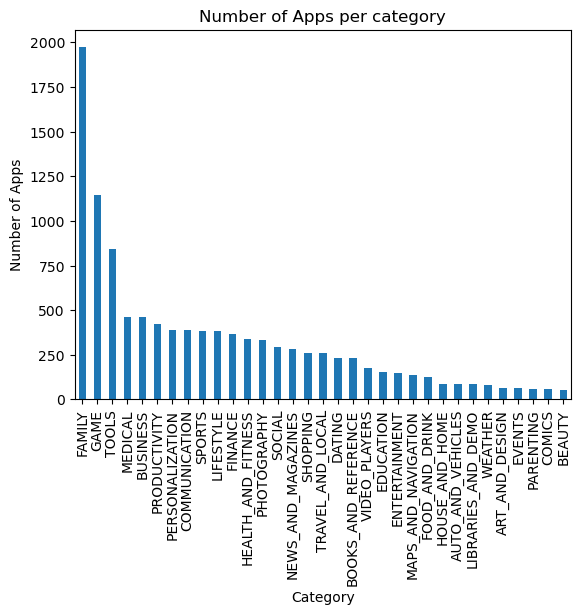

In [86]:
plt.figsize=(12,6)
Category_counts.plot(kind='bar')
plt.title("Number of Apps per category")
plt.xlabel("Category")
plt.ylabel("Number of Apps")

In [87]:
avg_rating= df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

In [88]:
print(avg_rating.head(10))

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
Name: Rating, dtype: float64


In [89]:
import seaborn as sns

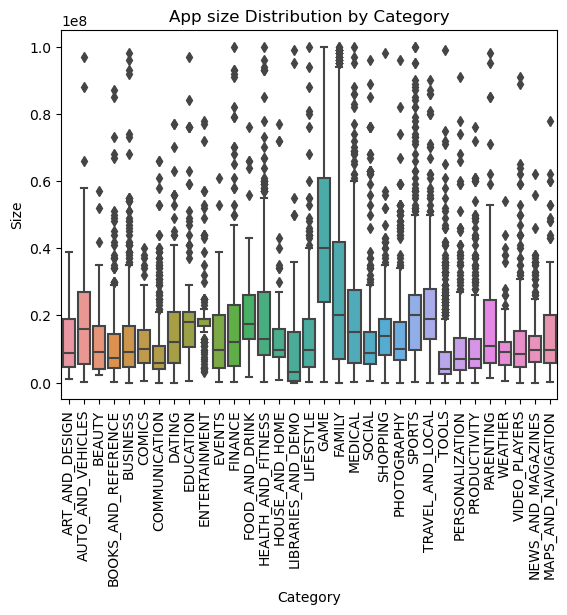

In [90]:
plt.figsize=(10,6)
sns.boxplot(x='Category', y='Size', data=df)
plt.xticks(rotation=90)
plt.title("App size Distribution by Category")
plt.show()

In [91]:
top_installs = df[['App', 'Category', 'Installs']].sort_values(by ='Installs',ascending= False )
print((top_installs).head(10))

                                           App       Category      Installs
3896                            Subway Surfers           GAME  1.000000e+09
3943                                  Facebook         SOCIAL  1.000000e+09
335   Messenger – Text and Video Chat for Free  COMMUNICATION  1.000000e+09
3523                              Google Drive   PRODUCTIVITY  1.000000e+09
3565                              Google Drive   PRODUCTIVITY  1.000000e+09
2884                             Google Photos    PHOTOGRAPHY  1.000000e+09
3665                                   YouTube  VIDEO_PLAYERS  1.000000e+09
2853                             Google Photos    PHOTOGRAPHY  1.000000e+09
4234             Skype - free IM & video calls  COMMUNICATION  1.000000e+09
3687                   Google Play Movies & TV  VIDEO_PLAYERS  1.000000e+09


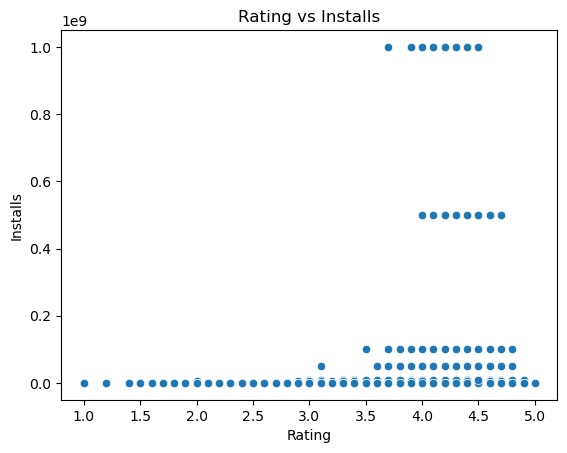

In [92]:
plt.figsize=(12,6)
sns.scatterplot(x='Rating', y='Installs',data=df)
plt.title("Rating vs Installs")
plt.show()

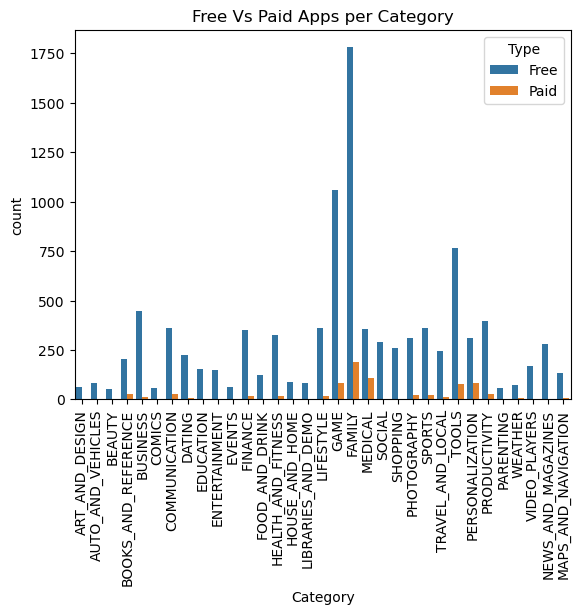

In [93]:
sns.countplot(x='Category', hue='Type', data=df)
plt.xticks(rotation=90)
plt.title("Free Vs Paid Apps per Category")
plt.show()

In [94]:
avg_Rating_type=df.groupby('Type')['Rating'].mean()
print(avg_Rating_type)

Type
Free    4.186203
Paid    4.266615
Name: Rating, dtype: float64


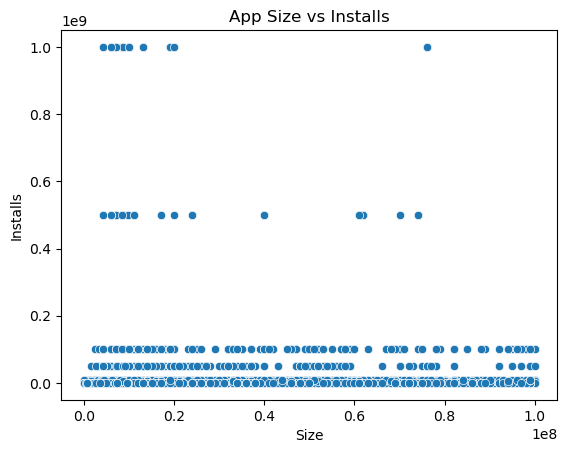

In [95]:
plt.figsize=(10,6)
sns.scatterplot(x='Size', y='Installs', data=df)
plt.title("App Size vs Installs")
plt.show()

In [97]:
df['Rating']= df['Rating'].astype(str)

In [98]:
print("Rating_dirty:", df[~df['Rating'].str.replace('.','',regex=False).str.isnumeric()]['Rating'].unique())

Rating_dirty: ['nan']


In [101]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [102]:
print(df['Rating'].isna().sum())  # Count of missing ratings


1474


In [103]:
df['Rating']=df['Rating'].fillna(df['Rating'].median())

In [104]:
print(df['Rating'].isna().sum())

0


In [105]:
df['Rating']=df['Rating'].astype(str)

In [107]:
print(df['Rating'].isna().sum())

0


In [108]:
df['Rating'] = pd.to_numeric(df['Rating'],errors='coerce')